
# 1. Analisis exploratorio GDP per capita / Esperanza de vida



Importar librerías

In [60]:
#Librería
import pandas as pd
import numpy as np


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Nulos
import missingno as msn
import os
import re
import sys



Cargar datos

In [61]:
#Capturar archivo de datos
path = r'C:\Users\xxaby\Desktop\master\TFM'
filehomicide = 'homicide_rate_unodc.csv'
filepercapita = 'gdp_per_capita_penn_world_table.csv'
fileesperanzavida = 'life_expectancy.csv'
funciones_auxiliares = 'funciones_auxiliares_done.py'


#Path
ruta_completahomicide = os.path.join(path, filehomicide)
ruta_completapercapita = os.path.join(path, filepercapita)
ruta_completaesperanzavida = os.path.join(path, fileesperanzavida)


#Cargar el archivo csv
dfhomicide = pd.read_csv(ruta_completahomicide)
#dfhomicide
#dfhomicide.count()


dfpercapita = pd.read_csv(ruta_completapercapita)
#dfpercapita
##dfpercapita.count()


dfesperanzavida = pd.read_csv(ruta_completaesperanzavida)
#dfpercapita
##dfpercapita.count()


# 2. Ver los datos 

In [62]:
print(dfhomicide.isna().mean()*100)
dfhomicide.count()
# Como podemos apreciar tenemos el Code un perocentaje de un 4% de 4028 filas seria unas 160 vacias 

Entity                                                          0.000000
Code                                                            4.186489
Year                                                            0.000000
Homicide rate per 100,000 population - Both sexes - All ages    0.000000
dtype: float64


Entity                                                          4204
Code                                                            4028
Year                                                            4204
Homicide rate per 100,000 population - Both sexes - All ages    4204
dtype: int64

In [63]:
print(dfpercapita.isna().mean()*100)
dfpercapita.count()

# Como podemos apreciar no tenemos ningún nulo

Entity                                                0.0
Code                                                  0.0
Year                                                  0.0
GDP per capita (output, multiple price benchmarks)    0.0
dtype: float64


Entity                                                10108
Code                                                  10108
Year                                                  10108
GDP per capita (output, multiple price benchmarks)    10108
dtype: int64

In [64]:
print(dfesperanzavida.isna().mean()*100)
dfesperanzavida.count()
# Como podemos apreciar tenemos el Code un perocentaje de un 8.16% de 19061 filas seria unas 1555 vacias 

Entity                                                 0.000000
Code                                                   8.161889
Year                                                   0.000000
Period life expectancy at birth - Sex: all - Age: 0    0.000000
dtype: float64


Entity                                                 20755
Code                                                   19061
Year                                                   20755
Period life expectancy at birth - Sex: all - Age: 0    20755
dtype: int64

# 3. Crear un único dataframe con los datos

In [65]:
# Unir PIB y homicidios
df_inicialespehomi = pd.merge(dfesperanzavida, dfhomicide, on=['Entity', 'Year'])


#filtraje de años
df_inicialespehomi = df_inicialespehomi[(df_inicialespehomi['Year'] >= 2000) & (df_inicialespehomi['Year'] <= 2019)]


#Contar nulos 
#print(df_inicial.isnull().sum())
df_inicialespehomi.info()
df_inicialespehomi.columns
df_inicialespehomi


<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 0 to 4015
Data columns (total 6 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        2772 non-null   object 
 1   Code_x                                                        2772 non-null   object 
 2   Year                                                          2772 non-null   int64  
 3   Period life expectancy at birth - Sex: all - Age: 0           2772 non-null   float64
 4   Code_y                                                        2772 non-null   object 
 5   Homicide rate per 100,000 population - Both sexes - All ages  2772 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 151.6+ KB


,Entity,Code_x,Year,Period life expectancy at birth - Sex: all - Age: 0,Code_y,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,60.3636,AFG,4.071527
1,Afghanistan,AFG,2010,60.8508,AFG,3.487093
2,Afghanistan,AFG,2011,61.4191,AFG,4.208668
3,Afghanistan,AFG,2012,61.9230,AFG,6.393913
4,Afghanistan,AFG,2015,62.6587,AFG,9.975262
...,...,...,...,...,...,...
4011,Zimbabwe,ZWE,2006,45.3635,ZWE,8.693896
4012,Zimbabwe,ZWE,2010,50.6523,ZWE,5.537482
4013,Zimbabwe,ZWE,2012,55.6263,ZWE,7.395217
4014,Zimbabwe,ZWE,2018,61.4141,ZWE,4.876369


In [66]:

# Unimos los DF necesarios
df_espehomi = pd.merge(dfesperanzavida, dfhomicide, on=['Entity', 'Code', 'Year'])
df_espehomi


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,60.3636,4.071527
1,Afghanistan,AFG,2010,60.8508,3.487093
2,Afghanistan,AFG,2011,61.4191,4.208668
3,Afghanistan,AFG,2012,61.9230,6.393913
4,Afghanistan,AFG,2015,62.6587,9.975262
...,...,...,...,...,...
4013,Zimbabwe,ZWE,2012,55.6263,7.395217
4014,Zimbabwe,ZWE,2018,61.4141,4.876369
4015,Zimbabwe,ZWE,2019,61.2925,5.145035
4016,Zimbabwe,ZWE,2020,61.1242,4.977770


# 4. Filtros
Acordados en reunión para el procesamiento de los datos

In [67]:
# Unir PIB y homicidios
df_inicialpibhomi = pd.merge(dfpercapita, dfhomicide, on=['Entity', 'Year'])

#filtraje de años
df_inicial = df_inicialpibhomi[(df_inicialpibhomi['Year'] >= 2000) & (df_inicialpibhomi['Year'] <= 2019)]

#Contar nulos 
#print(df_inicial.isnull().sum())
#df_inicial.info()
df_inicial



,Entity,Code_x,Year,"GDP per capita (output, multiple price benchmarks)",Code_y,"Homicide rate per 100,000 population - Both sexes - All ages"
8,Albania,ALB,2000,5315.4300,ALB,4.116881
9,Albania,ALB,2001,5525.6910,ALB,6.976128
10,Albania,ALB,2002,5636.1846,ALB,6.915206
11,Albania,ALB,2003,5861.1265,ALB,5.366973
12,Albania,ALB,2004,6038.8965,ALB,4.277380
...,...,...,...,...,...,...
3309,Zimbabwe,ZWE,2006,1359.0446,ZWE,8.693896
3310,Zimbabwe,ZWE,2010,2281.9915,ZWE,5.537482
3311,Zimbabwe,ZWE,2012,2762.6843,ZWE,7.395217
3312,Zimbabwe,ZWE,2018,3007.2370,ZWE,4.876369


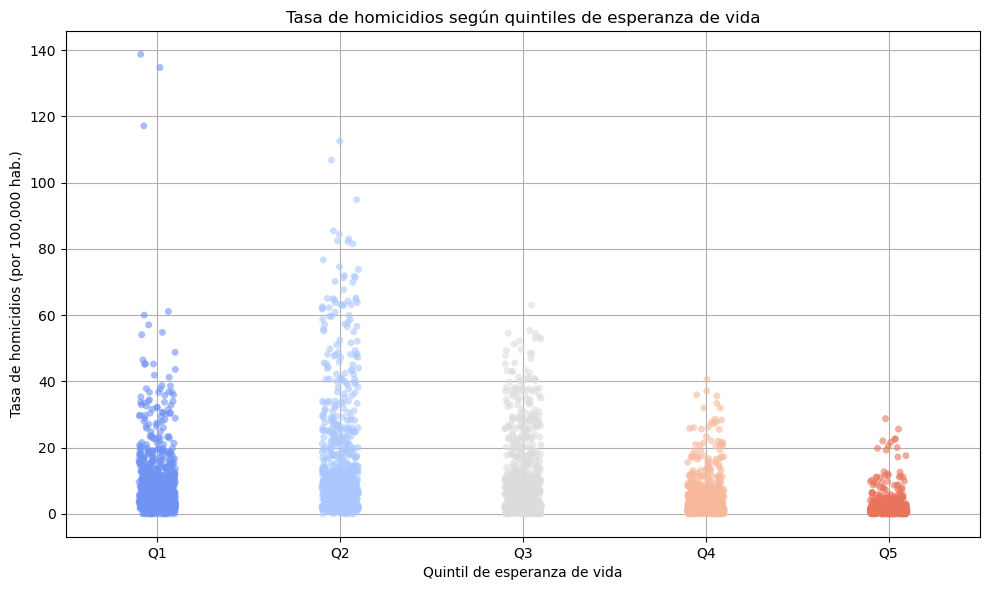

In [68]:


# Renombrar columnas
df_espehomi = df_espehomi.rename(columns={
    'Period life expectancy at birth - Sex: all - Age: 0': 'Esperanza de vida',
    'Homicide rate per 100,000 population - Both sexes - All ages': 'Tasa de homicidios'
})

# Crear columna de quintiles de esperanza de vida
df_espehomi['Quintil_vida'] = pd.qcut(df_espehomi['Esperanza de vida'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Gráfico
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_espehomi,
    x='Quintil_vida',
    y='Tasa de homicidios',
    hue='Quintil_vida',
    jitter=True,
    alpha=0.6,
    palette='coolwarm',
    legend=False
)

plt.title('Tasa de homicidios según quintiles de esperanza de vida')
plt.xlabel('Quintil de esperanza de vida')
plt.ylabel('Tasa de homicidios (por 100,000 hab.)')
plt.grid(True)
plt.tight_layout()
plt.show()


# GRÁFICO
* Los países se agrupan en quintiles según su esperanza de vida (Q1 = menor, Q5 = mayor).
* El stripplot muestra cómo varía la tasa de homicidios dentro de cada grupo de esperanza de vida.
* La paleta coolwarm resalta el contraste entre países con menor y mayor longevidad.


# HIPÓTESIS
* La tasa de homicidios no varía entre quintiles de esperanza de vida.
* Los países con mayor esperanza de vida tienden a tener menores tasas de homicidios.

# CONCLUSIONES

1. El gráfico muestra una tendencia descendente clara: al aumentar la esperanza de vida (Q1→Q5), la tasa de homicidios disminuye.
2. Los países con mayor longevidad (Q4–Q5) tienen niveles de homicidios muy bajos.
3. Los de menor esperanza de vida (Q1–Q2) presentan más dispersión y tasas altas.
4. Refuerza la relación inversa entre violencia y longevidad.

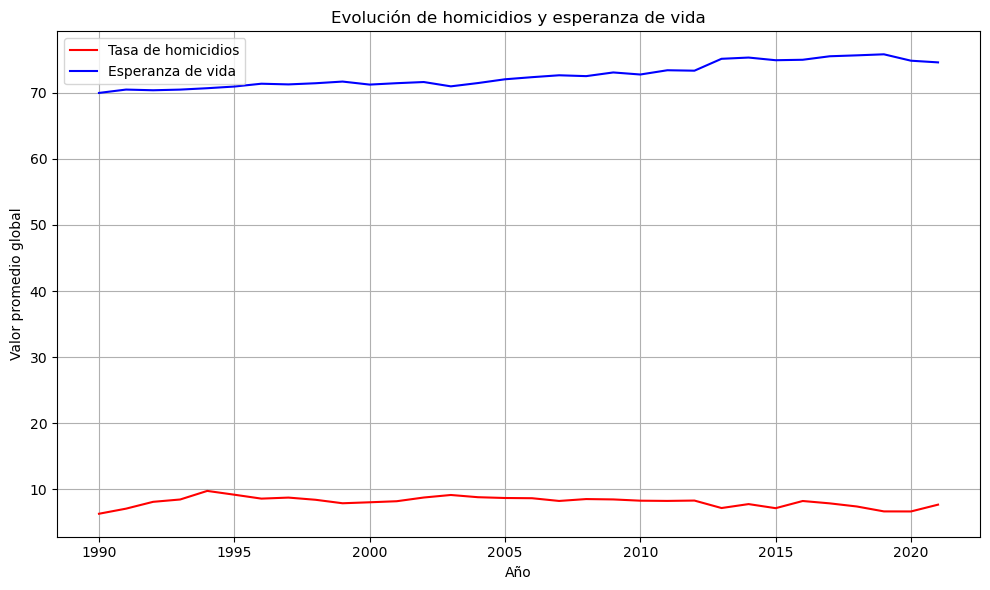

In [69]:
# Agrupar por año y calcular la media
df_evohom = df_espehomi.groupby('Year')[['Tasa de homicidios', 'Esperanza de vida']].mean().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_evohom, x='Year', y='Tasa de homicidios', label='Tasa de homicidios', color='red')
sns.lineplot(data=df_evohom, x='Year', y='Esperanza de vida', label='Esperanza de vida', color='blue')


plt.title('Evolución de homicidios y esperanza de vida')
plt.xlabel('Año')
plt.ylabel('Valor promedio global')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# GRÁFICO
* El gráfico muestra dos líneas, una roja para la tasa global promedio de homicidios, y una azul para la esperanza de vida promedio global.
* El eje X representa los años, y el eje Y los valores promedio.


# HIPÓTESIS
* Hipótesis nula (H₀): La evolución de la tasa de homicidios no afecta significativamente la evolución de la esperanza de vida global.
* Hipótesis alternativa (H₁): Cambios en la tasa de homicidios están asociados a variaciones en la esperanza de vida global.

# CONCLUSIONES
1. La esperanza de vida muestra una tendencia ascendente suave, pasando de ~70 a ~73 años.
2. La tasa de homicidios fluctúa más, con picos y caídas, pero se mantiene entre 6 y 10.
3. No hay una relación directa entre ambas curvas, lo que sugiere que a nivel global, la violencia no ha impedido el avance en salud pública.
